# Основные концепции Machine Learning. Домашняя работа

In [3]:
### Тут нужно сделать импорты всех необходимых библиотек ###

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.cluster import KMeans

c:\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
### Здесь требуется загрузить датасет phones.csv ###

In [3]:
phones = pd.read_csv("1.8_phones.csv")
phones.head(5)

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013


In [ ]:
### Опционально: используя matplotlib, можно сделать визуализацию загруженного датасета ###

In [4]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # для отрисовки 3D проекции

matplotlib.rc("font", size=18) # для увеличения шрифта подписей графиков

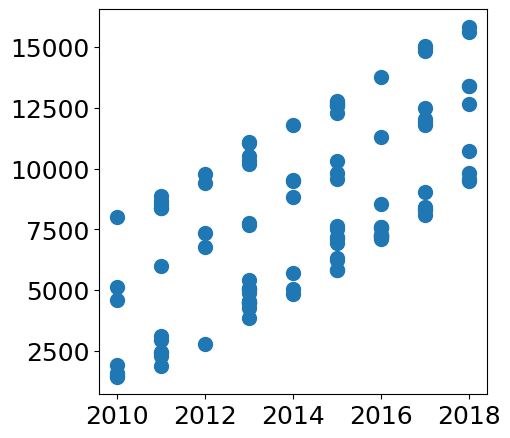

In [5]:
### Отображение датасета

fig = plt.figure(figsize=(5, 5)) # создаем картинку
ax = plt.axes()

# помещаем точки на график
ax.scatter(phones["year"], phones["price"], s=100)

# отображаем картинку
plt.show()

Задание 1: обучить модель регрессии

In [6]:
from sklearn.linear_model import LinearRegression # импорт модели

In [7]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[["year"]] 
Y = phones["price"]

In [ ]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

In [8]:
reg = LinearRegression().fit(X,Y)
[b] = reg.coef_
a = reg.intercept_

# создаем функцию для предсказания цены телефона
def reg_prediction(year):
    return a + b * year

In [9]:
reg_prediction(X.year[0])

9838.83475733595

In [10]:
reg_prediction(2019)

12750.022550598718

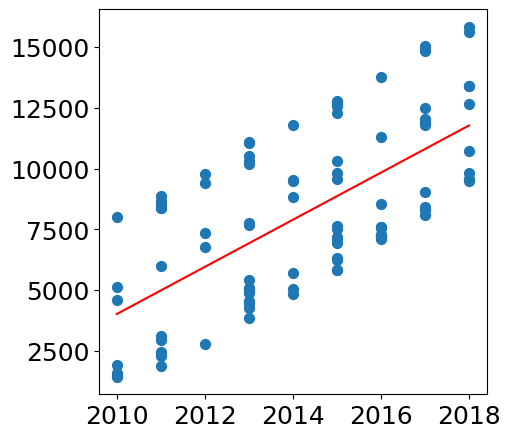

In [11]:
fig = plt.figure(figsize=(5, 5)) # создаем картинку
ax = plt.axes()

# помещаем точки на график
ax.scatter(phones["year"], phones["price"], s=50)
# помещаем предсказания
ax.plot([X.year.min(), X.year.max()], [reg_prediction(X.year.min()), reg_prediction(X.year.max())], c="red")

# отображаем картинку
plt.show()

Задание 2: обучить модель классификации

In [12]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[["year", "disk"]]
y = phones["price"]

In [ ]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

In [13]:
cl = DecisionTreeClassifier().fit(X, y)
print(export_text(cl))

|--- feature_0 <= 2017.50
|   |--- feature_1 <= 24.00
|   |   |--- feature_0 <= 2010.50
|   |   |   |--- class: 1599
|   |   |--- feature_0 >  2010.50
|   |   |   |--- feature_0 <= 2011.50
|   |   |   |   |--- class: 1890
|   |   |   |--- feature_0 >  2011.50
|   |   |   |   |--- feature_0 <= 2012.50
|   |   |   |   |   |--- class: 2780
|   |   |   |   |--- feature_0 >  2012.50
|   |   |   |   |   |--- feature_0 <= 2013.50
|   |   |   |   |   |   |--- class: 4473
|   |   |   |   |   |--- feature_0 >  2013.50
|   |   |   |   |   |   |--- feature_0 <= 2014.50
|   |   |   |   |   |   |   |--- class: 4832
|   |   |   |   |   |   |--- feature_0 >  2014.50
|   |   |   |   |   |   |   |--- feature_0 <= 2015.50
|   |   |   |   |   |   |   |   |--- class: 5814
|   |   |   |   |   |   |   |--- feature_0 >  2015.50
|   |   |   |   |   |   |   |   |--- feature_0 <= 2016.50
|   |   |   |   |   |   |   |   |   |--- class: 7091
|   |   |   |   |   |   |   |   |--- feature_0 >  2016.50
|   |   |   |  

In [14]:
# предсказываем цену для индексов 5-8, выводим первое предсказание и реальное значение пятого индекса
cl.predict(X[0:1])[0], y[0]

(7197, 7256)

Задание 3: обучить модель кластеризации

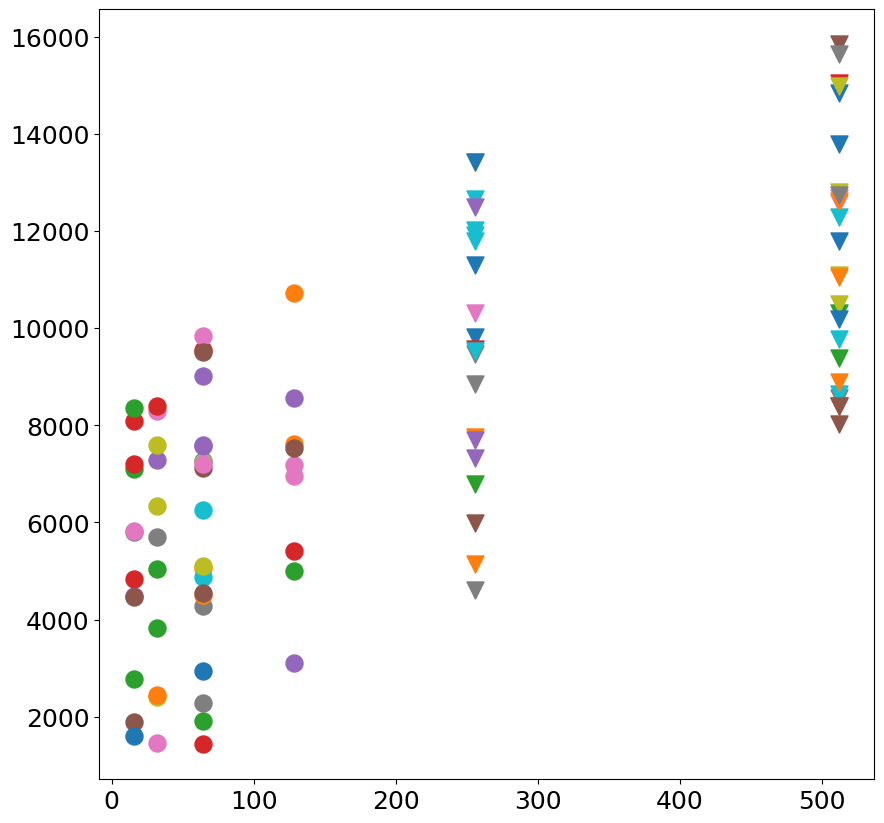

In [16]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку

default_marker = "."

markers = {"Android":"o", "iOS": "v"}

for p, d, o in zip(phones.disk, phones.price, phones.os):
    marker = markers.get(o, default_marker)
    plt.scatter(p, d, s=150, marker=marker)

# отображаем картинку
plt.show()

In [20]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[["disk","price"]] 

In [21]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###
clust = KMeans(n_clusters=3).fit(X)
[c1, c2, c3] = clust.cluster_centers_

In [22]:
default_marker = "."
markers = {"Android":"o", "iOS": "v"}

clust.cluster_centers_

array([[  212.17391304,  8323.32608696],
       [   70.4       ,  3958.53333333],
       [  410.66666667, 12896.83333333]])

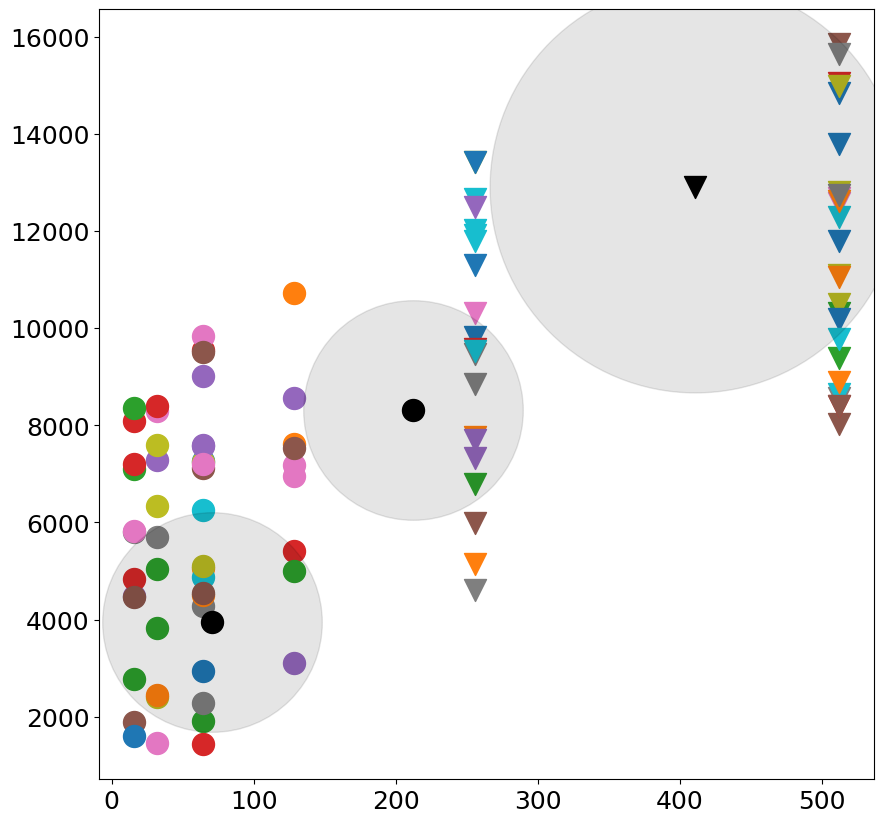

In [23]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку

for p, d, o in zip(phones.disk, phones.price, phones.os):
    marker = markers.get(o, default_marker)
    plt.scatter(p, d, s=250, marker=marker)

# добавляем информацию о центрах кластеров
plt.scatter(c1[0], c1[1], s=250, marker="o", c="black")
plt.scatter(c1[0], c1[1], s=250 * 1e2, c="black", alpha=0.1)

plt.scatter(c2[0], c2[1], s=250, marker="o", c="black")
plt.scatter(c2[0], c2[1], s=250 * 1e2, c="black", alpha=0.1)

plt.scatter(c3[0], c3[1], s=250, marker="v", c="black")
plt.scatter(c3[0], c3[1], s=250 * 3.5e2, c="black", alpha=0.1)

# отображаем картинку
plt.show()